<a href="https://colab.research.google.com/github/AlexandraJMV/ADA-Informes/blob/main/Informe_10_Problema_de_la_mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Informe 10



## 1. **Problema**: *Problema de la mochila*

Este problema de optimización consiste en maximizar el valor total de un conjunto de objetos seleccionados, dado previamente una lista de valores individuales, una lista de pesos asociados y un peso máximo a considerar para la agregación de los elementos. Cada elemento solo puede ser seleccionado una vez y no se pueden considerar fracciones de objetos *(Razón por la cual se le conoce como **0-1 knapsack problem**)*

<center>

<img src='https://hideoushumpbackfreak.com/algorithms/images/knapsack_problem.png'>

</center>


#### ***Entrada***: Dos arreglos $v_i$ y $w_i$, correspondientes al precio y peso respectivamente para un objeto $i$ entre $n$ elementos, además de una capacidad máxima $W$

#### ***Salida***: El valor máximo que se puede obtener al elegir un conjunto de los elementos disponibles, teniendo en cuenta la capacidad máxima de peso $W$.



## 2. *Algoritmo*

### 2.1 ***Código***

In [64]:
# Generador de instancias
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(3)

W, val, wt

(7, [20, 100, 115], [4, 5, 6])

#### Algoritmo usando programacion dinámica

In [70]:
def dynamic_knapsack(W, val, wt, n, verbose = False):

    # Generar matriz que guarde los resultados optimos a subproblemas
    values = [[0 for _ in range( W + 1 )] for _ in range(n + 1)]

    # Contador de subproblemas
    cont = 0

    if verbose == True:
        print(f"Problema de la mochila\n")

        print(f"Claves : {[i for i in range(1, n+1)]}")
        print(f"Valores : {val}")
        print(f"Pesos : {wt}\n")

        print(f"Peso maximo de la mochila : {W}")

        print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++\n")


    for i in range (n+1):           # Recorrer para cantidad de items 
        for j in range (W+1):       # Recorrer para pesos maximos

            cont += 1

            if verbose == True :
                print(f"Resolviendo problema n°{cont}")
                print(f"Para las primeras {i} claves y una capcidad maxima de {j}\n")

            # Caso base, no claves o capacidad de 0
            if i == 0 or W == 0 :
                if verbose == True:
                    print("Caso base, no hay claves o la capacidad es 0")

                values[i][j] == 0
            else:

                # Resolucion basada en resultados previos
                if wt[i-1] <= j :
                    
                    a = val[i-1] + values[i-1][j-wt[i-1]]
                    b = values[i-1][j]

                    if verbose == True:
                        print(f"Valor del problema anterior ({i-1} claves y {j} de capacidad): {values[i-1][j]}")
                        print(f"Precio y valor del item {i} : {val[i-1]}, {wt[i-1]}")
                        print(f"Valor del problema para una mochila de {i-1} elementos y capacidad {j-wt[i-1]}: {values[i-1][j-wt[i-1]]}\n")

                        if a > b :
                            print(f"El nuevo item forma parte de la solucion optima, su valor es: {a}\n")
                        else:
                            print(f"El nuevo item {i} de peso {wt[i-1]} no forma parte de la solucion optima, su valor es el anterior : {b}\n")
                    
                    values[i][j] = max(a, b)

                else:
                    if verbose == True:
                        print(f"El peso de la clave actual supera la capacidad maxima")
                        print(f"Se ha tomado el valor maximo para capcidad {j} y un item menos :{values[i-1][j]}\n")

                    values[i][j] = values [i-1][j]
            
            if verbose == True:
                    print(f"Valor maximo para {i} claves y capacidad maxima {j}: {values[i][j]}")
                    print("\n-------------------------------------------------------------------------------\n")
                
    
    if verbose == True:
        print(f"Valor maximo a cargar dada una capacidad de {W} :\n{values[n][W]}\n")
        print(f"Se ha llegado al resultado resolviendo {cont} subproblemas!")

    return values[n][W], cont, values

# Ejemplo

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)

valor, comp , valores = dynamic_knapsack(W, val, wt, n, verbose = False)

print(f"El valor maximo es {valor} con {comp} subproblemas")

El valor maximo es 220 con 204 subproblemas


#### Algoritmo greedy

In [66]:
def greedy_knapsack(W, val, wt, n, verbose = False):

    if verbose == True:
        print(f"Problema de la mochila\n")

        print(f"Claves : {[i for i in range(1, n+1)]}")
        print(f"Valores : {val}")
        print(f"Pesos : {wt}\n")

        print(f"Peso maximo de la mochila : {W}")

        print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

    # Lista de indices
    index = list(range(n))

    # Calculo de valor por unidad de peso
    vp = [value/weight for value, weight in zip(val, wt)]
    
    # Ordenar indices segun su valor por unidad de peso
    index.sort(key=lambda i: vp[i], reverse=True)

    if verbose == True:
        print(f"Valor de items por unidad de peso : {vp}")
        print(f"Index ordenados segun valor : {index}")
        print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

    max_value = 0
    max_weight = W
    items = []
    iterations = 0

    # Agregar items
    for i in index:

        iterations += 1

        if verbose == True:
            print(f"Iteracion {iterations}\n")

        if wt[i] <= max_weight:
            max_value += val[i]
            max_weight -= wt[i]
            items.append(i)

            if verbose == True:
                print(f"Se ha agregado el elemento {i} a la lista")
                print(f"Precio y peso del item : {val[i]}, {wt[i]}")
                print(f"El valor actual y capacidad restantes son {max_value} y {max_weight} respectivaente\n")

        else:
            if verbose == True:
                print(f"El item {i} no puede ser agregado a la lista")
                print(f"Precio y peso del item : {val[i]}, {wt[i]}\n")
    
            continue
    
    if verbose == True:
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
        print(f"Valor maximo a cargar dada una capacidad de {W} :\n{max_value}\n")
        print(f"Se ha llegado al resultado con {iterations} iteraciones!")
        print(f"Lista de elementos : {items}")
        print(f"Espacio restante : {max_weight}")

    
    return max_value, items, iterations

greedy_knapsack(W, val, wt, n, verbose = False)

# Ejemplo 

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)

valor, items, iteraciones = greedy_knapsack(W, val, wt, n, verbose = False)

print(f"El supuesto valor maximo es {valor} con {iteraciones} iteraciones")
print(f"Items : {items}")

El supuesto valor maximo es 160 con 3 iteraciones
Items : [0, 1]


La siguiente imaagen representa las soluciones del ejemplo anterior, tanto para el algoritmo dinámico como parala estrategia greedy.

>b.1) Corresponde al resultado óptimo. Se nota que este fue el resultado del algoritmo usando programación dinámica.

>b.2) Corresponde al resultado entregado por la estrategia greedy. Se nota que, a pesar de ser los dos elementos con mayor valor por peso, no es la solución óptima, incluso si se considera el elemento mas valioso *(Comparación con b.3)*

<center>

<img src='https://i.imgur.com/In8ulW6.png'>
Fuente: Introduction to Algorithms

</center>

### 2.2 ***Descripción del algoritmo***

Al analizar el algoritmo se nota una superposición de subproblemas, lo que indica una necesidad de tomar desiciones que disminuyan la cantidad de cálculos realizados por el algoritmo *(Divide y Vencerás es ineficiente)*

Para ambos acercamientos que se utilizarán a continuación aprovechan de la *subestructura óptima* del problema para resolverlo. A pesar de esta similitud, se mostrará que la decisión entre un *algoritmo dinámico* y *greedy* no es trivial.<br>
<br>

---

<br>

#### ***Subestructura óptima***

Sea $C[n,W]$ el problema de la mochila para los primeros $n$ elementos y de una capacidad máxima $W$.

Si $(x_1, x_2, ..., x_n)$ es una solución óptima para $C[n,W]$, entonces:

1. Si $x_n = 0$, es decir, no se ha elegido el elemento $x_n$, el conjunto $(x_1, x_2, ..., x_{n-1})$ es la solución óptima para $C[n-1, W]$

2. Si $x_n = 1$, se ha elegido el elemento $x_n$ y el conjunto $(x_1, x_2, ..., x_{n-1})$ es la solución óptima para $C[n-1, W-w_n]$

Es decir, para un problema tendremos que si la solución no incluye al elemento a agregar, su valor óptimo será aquel del problema con misma capacidad pero un elemento menos. Por otro lado, si la solución inlcuye al elemento $x_n$, el valor óptimo consistirá en el precio $p_n$ del elemento más la solución óptima para el problema que no incluya a $x_n$ y tenga una capacidad reducida según $w_n$

$C[n, W] = max(C[n-1, W]$,  $C[n-1, W-w_n] + p_n)$

<br>

---

<br>

#### ***Función de recursión***

A partir de la información anterior se puede construir la siguiente función recursiva:

$C[i, W] =\begin{cases}
  0  & \text{si $i = 0$ o $W = 0$} \\
  C[i-1, W] & \text{si $w_i > W$} \\
  max(C[i-1, W], C[i-1, W-w_i] + p+i) & \text{si $i>0$ y $W \ge w_i$}
\end{cases}$

Donde la solución al problema original está dada por $C[n, W]$





#### **Descripción para el algoritmo dinámico**

El algoritmo dinámico *bottom-up*  consiste en rellenar una matriz con los resultados de subproblemas cuyas dimensiones están delimitadas por los índices de la misma.

La matriz se va rellenando considerando uno a uno cada cantidad de claves y cada capacidad máxima posible de manera creciente

El procedimiento es el siguiente:
> Se declara la matriz para almacenar los subproblemas de dimensiones Values[0.. n, 0.. W]
>
> Se recorre cada fila de la matriz de forma ascendiente. La primera iteración, cuando $i = 0$, considera $0$ elementos para agregar a la mochila. De forma análoga, cuando $i = 4$ se consideran 4 elementos para agregar a la mochila
>
>> Para cada iteración de $i$, se itera para cada capacidad $j = 0.. W$ posible.
>>> Si $i==0$ o $W==0$, no hay items o espacio para almacenar. El valor máximo en estas ocasiones es $0$.
>>>
>>> Si el peso de elemento $w_{i-1}$ es mayor al de la capacidad actual considerada, el valor máximo de este caso será aquel de igual capacidad pero sin el elemento considerado *(Uno de los problemas previamente resueltos)*
>>>
>>> En cualquier otro caso, el valor máximo estará dado por la cantidad mayor de dos opciones:
>>> * El valor máximo para el problema de misma capacidad pero sin considerar el $i$-ésimo elemento.
>>> * El valor del elemento a considerar más el valor máximo para el problema que no considera el elemento $i$-ésimo y con capacidad $w-w_i$ *(Capacidad restante al agregar el $i$-ésimo)*

Al finalizar, el resultado óptimo final será definido por $values[n, W]$, ya que considera todas las claves y la capacidad máxima posible.<br><br>

---

<br>






#### **Descripción para estrategia greedy**

Para esta estrategia se define una *elección greedy*. La idea es decidir que realizar antes de resolver algún subproblema.

***Elección greedy***: Se selecciona aquel elemento con mayor valor por peso con la intención de maximizar la ganancia obtenida.

Este algoritmo recibe como entrada el arreglo de precios $p_i$, el arreglo de pesos $w_i$, la capacidad máxima $W$ y el total de claves $n$

El procedimiento es el siguiente:<br>
1. Se generan dos arreglos, uno conteniendo índices y otro el valor por peso. 
* $index = [0... n-1]$
* $values = [\frac{p_0}{w_0}, ... \frac{p_{n-1}}{w_{n-1}}]$
2. Se ordenan los índices según su valor por peso asociados

3. Se declaran dos variables, una para almacenar el valor total y otra para almacenar la capacidad disponible luego de agregar algún elemento.

4. Se itera por cada índice del arreglo de indices, agregando el elemento considerado si la capacidad restante lo permite.

Al finalizar el algoritmo entregará el valor óptimo encontrado. Sin embargo, el resultado puede no siempre ser correcto.












### 2.3 ***Ejemplo***

Para realizar los ejemplos consideremos los siguientes arreglos para $n = 3$ elementos:

$p_i = [11, 18, 28]$

$w_i = [1, 3, 4]$

Siendo $p[i]$ y $w[i]$ el precio y peso para un elemento $i$, respectivamente. Además, tenemos una capacidad máxima $W = 4$







#### **Ejemplo dinámico**

En primer lugar se crea la matriz de valores óptimos. Esta matriz tiene dimensiones de $n = 0... 3$ $\cdot$ $W = 0... 4$, es decir, $4$ filas y $5$ columnas.

>$values = $<br>
<center>

> $[0, 0, 0, 0, 0]$<br>
> $[0, 0, 0, 0, 0]$<br>
> $[0, 0, 0, 0, 0]$<br>
> $[0, 0, 0, 0, 0]$<br>

</center>

Luego recorremos la matriz con tal de resolver todos los subproblemas$[i][j]$.

<br>

`Primera iteración de i, i = 0`

> Como `i = 0`, toda la fila contendrá $0$s, finalizamos con la misma matriz.

<br>

`Segunda iteración de i, i = 1`

Esta iteración resuelve los subproblemas que solo consideran la primera clave : $p_i = 11$, $w_i = 1$

A continuación, se itera para todas las capacidades máximas posibles


> `w = 0`<br>
> Como $w=0$, el valor máximo alcanzable de este subproblema es aquel del subproblema anterior *(Misma capacidad pero un item menos)* : 
>
>$values[i][j] = values[1][0] = values[0][0] = 0$


> `w = 1`<br>
> $values[i][j] = values[1][1]$ toma el valor de una mochila con el elemento agregado, más la solución óptima de una mochila con el peso sobrante : 
>
>$values[1][1] = p_{i-1} + values[0][0] = 11$
>
>Esto debido a que la capacidad es mayor al peso del item considerado y, además, el calor total al agregar el item es mayor a aquel caso en el cuál no se agrega

Se observa que siemore se considera el mismo item, por lo que la fila correspondiente a un solo item tendrá el mismo resultado desde la capacidad $1$

Matriz resultante:

>$values = $<br>
<center>

> $[0, 0, 0, 0, 0]$<br>
> $[0, 11, 11, 11, 11]$<br>
> $[0, 0, 0, 0, 0]$<br>
> $[0, 0, 0, 0, 0]$<br>

</center>

<br>

`Tercera iteración de i, i = 2`

> `w = 0`<br>
> Como $w=0$, el valor máximo alcanzable será 0 *(No hay espacio para ningún elemento)*

> `w = 1`<br>
> Como la capacidad del elemento $w_2 = 3$ supera $w=1$, se toma el valor anterior.
>
>Por lo tanto, $values[2][1] = 11$

> `w = 2`<br>
> Como la capacidad del elemento $w_2$ supera $w$, se toma el valor anterior.
>
>Por lo tanto, $values[2][2] = 11$

> `w = 3`<br>
> Se evalúa cual de las opciones entrega la mayor solución:
>
>$max(11, 0 + 18) = 18$
>
>$values[2][3] = 29$

> `w = 4`<br>
> Se evalúa cual de las opciones entrega la mayor solución:
>
>$max(11, 11 + 18) = 29$
>
>$values[2][4] = 29$

Matriz resultante:

>$values = $<br>
<center>

> $[0, 0, 0, 0, 0]$<br>
> $[0, 11, 11, 11, 11]$<br>
> $[0, 11, 11, 18, 29]$<br>
> $[0, 0, 0, 0, 0]$<br>

</center>

<br>

`Cuarta iteración de i, i = 3`
> `w = 0`<br>
> Como $w=0$, el valor máximo alcanzable será 0 *(No hay espacio para ningún elemento)*

> `w = 1`<br>
> Como la capacidad del elemento $w_3 = 4$ supera $w=1$, se toma el valor anterior.
>
>Por lo tanto, $values[3][1] = 11$

> `w = 2`<br>
> Como la capacidad del elemento $w_3$ supera $w$, se toma el valor anterior.
>>
>Por lo tanto, $values[3][2] = 11$

> `w = 3`<br>
> Como la capacidad del elemento $w_3$ supera $w$, se toma el valor anterior.
>
>Por lo tanto, $values[3][3] = 18$


> `w = 4`<br>
> Se evalúa cual de las opciones entrega la mayor solución:
>
>$max(29, 0 + 28) = 29$
>
>$values[3][4] = 29$

Matriz resultante:

>$values = $<br>
<center>

> $[0, 0, 0, 0, 0]$<br>
> $[0, 11, 11, 11, 11]$<br>
> $[0, 11, 11, 18, 29]$<br>
> $[0, 11, 11, 18, 29]$<br>

</center>

Por lo tanto, el valor óptimo para el problema es $29$




In [73]:
# Comprobar con implementacion 
val = [11, 18, 28]
wt = [1, 3, 4]
n = 3
W = 4

maximo, cont, valores = dynamic_knapsack(W, val, wt, n)

valores, maximo

([[0, 0, 0, 0, 0],
  [0, 11, 11, 11, 11],
  [0, 11, 11, 18, 29],
  [0, 11, 11, 18, 29]],
 29)

---
<br>

#### **Ejemplo greedy**

Se declaran dos arreglos de tamaño $n=3$ para almacenar el valor por unidad de peso y los índices :

$indices = [0, 1, 2]$

$values = [0, 0, 0]$

Se recorre y calcula el valor $values_i = \frac{p_i}{w_i}$ para cada par $p_i$ y $w_i$

$values = [11, 6, 7]$

Se ordenan los índices de mayor a menor según sus los valores calculados en $values$.

$indices = [0, 2, 1]$

Una vez ordenados los elementos según su valor por unidad de peso, se procede a ir agregando elementos hasta alcanzar la capacidad máxima. Para esto es necesario iterar por los índices, evaluando si se puede no agregar cada elemento leído.

Se declaran tres variables para almacear el valor total del conjunto de elementos que se van agregando, la capacidad restante por iteración y los elementos que se agregan en cada iteración.

$max = 0$

$capacity = W = 4$

$items = []$

`Primera iteración, index = 0`

>Como la capacidad disponible de la mochila es mayor a la del elemento siendo evaluado, se agrega este al conjunto solución.
>
>$max = max + p_0 = 11$<br>
>$capacity = capacity - w_0 = 3$<br>
>$items = items + index = [0]$

`Segunda iteración, index = 2`

>Como la capacidad disponible de la mochila es menor a la del elemento siendo evaluado, no se agrega al conjunto solución.

`Tercera iteración, index = 1`

>Como la capacidad disponible de la mochila es igual a la del elemento siendo evaluado, se agrega este al conjunto solución.
>
>$max = max + p_1 = 29$<br>
>$capacity = capacity - w_1 = 0$<br>
>$items = items + index = [0, 1]$

Se terminan las iteraciones pues se han recorrido todos los índices.<br><br>

---

<br>

Por lo tanto, según el algoritmo greedy, la ganancia máxima para este problema es de $29$







In [69]:
# Comprobar con implementacion 
val = [11, 18, 28]
wt = [1, 3, 4]
n = 3
W = 4

maximo, items, iteraciones = greedy_knapsack(W, val, wt, n)

print(f"El maximo es {maximo} con los elementos {items}")

El maximo es 29 con los elementos [0, 1]


### 2.4 ***Ejecución paso a paso (verbose = `True`)***

In [48]:
W, val, wt = knapsack_instance_generator(3)
W = 8
W, val, wt

(8, [16, 50, 75], [3, 5, 6])

***Dinámico***

In [49]:
dynamic_knapsack(W, val, wt, n, verbose = True)
print()

Problema de la mochila

Claves : [1, 2, 3]
Valores : [16, 50, 75]
Pesos : [3, 5, 6]

Peso maximo de la mochila : 8

+++++++++++++++++++++++++++++++++++++++++++++++++++++

Resolviendo problema n°1
Para las primeras 0 claves y una capcidad maxima de 0

Caso base, no hay claves o la capacidad es 0
Valor maximo para 0 claves y capacidad maxima 0: 0

-------------------------------------------------------------------------------

Resolviendo problema n°2
Para las primeras 0 claves y una capcidad maxima de 1

Caso base, no hay claves o la capacidad es 0
Valor maximo para 0 claves y capacidad maxima 1: 0

-------------------------------------------------------------------------------

Resolviendo problema n°3
Para las primeras 0 claves y una capcidad maxima de 2

Caso base, no hay claves o la capacidad es 0
Valor maximo para 0 claves y capacidad maxima 2: 0

-------------------------------------------------------------------------------

Resolviendo problema n°4
Para las primeras 0 claves y u

***Greedy***

In [51]:
greedy_knapsack(W, val, wt, n, verbose = True)
print()

Problema de la mochila

Claves : [1, 2, 3]
Valores : [16, 50, 75]
Pesos : [3, 5, 6]

Peso maximo de la mochila : 8

+++++++++++++++++++++++++++++++++++++++++++++++++++++

Valor de items por unidad de peso : [5.333333333333333, 10.0, 12.5]
Index ordenados segun valor : [2, 1, 0]

+++++++++++++++++++++++++++++++++++++++++++++++++++++

Iteracion 1

Se ha agregado el elemento 2 a la lista
Precio y peso del item : 75, 6
El valor actual y capacidad restantes son 75 y 2 respectivaente

Iteracion 2

El item 1 no puede ser agregado a la lista
Precio y peso del item : 50, 5

Iteracion 3

El item 0 no puede ser agregado a la lista
Precio y peso del item : 16, 3

+++++++++++++++++++++++++++++++++++++++++++++++++++++

Valor maximo a cargar dada una capacidad de 8 :
75

Se ha llegado al resultado con 3 iteraciones!
Lista de elementos : [2]
Espacio restante : 2



## 3. *Propiedades del algoritmo*

### 3.1 ***Tiempo de ejecución***

#### **Tiempo de ejecución para algoritmo bottom-up**

Para determinar el tiempo de ejecución hay que observar el funcionamiento del algoritmo.

> Se declara y rellena de 0 una matriz de tamaño $n\cdot w$, siendo $n$ la cantidad de claves disponibles y $w$ la capacidad máxima para el problema. $= O(n\cdot w)$
>
> Se observa la existencia de dos ciclos $n$ y $w$  anidados, cada uno corrspondiendo a la cantidad de items disponibles y la capacidad máxima para el problema, respectivamente. $= O(n\cdot w)$
>
>Dentro de estos ciclos se realizan operaciones de coste contante *(Acceso a matrices, sumas y comparaciones de dos elementos)* $= O(1)$

Por lo tanto, gracias a la matriz de valores, el tiempo de ejecución es de ***$O(n\cdot w)$***

<br>

---

#### ***Tiempo de ejecución para algoritmo greedy***

Para determinar el tiempo de ejecución del acercamiento greedy hay que observar las operaciones que realiza el algoritmo:

> Declaracion de un arreglo $= O(1)$
>
> Cálculo de valor por unidad de peso $= O(n)$
>
> Orden de los valores $= O(n\cdot log{n})$
>
> Declaración variables para almacenar información relevante $= 3\cdot O(1)$
>
> Iterar por el arreglo de indices de tamaño $n$ para agregar los valores : $=O(n)$
>
> Por cada iteración, se realizan 3 operaciones de costo constante $=3\cdot O(1)$

Terminamos con la siguiente expresión: $(2 + n)\cdot O(1) + O(n\cdot \log{n}) + O(n) = O(n\cdot \log{n})$

Por lo tanto, el tiempo de ejecución de algortimo será de ***$O(n\cdot \log{n}$***), principalmente dado al ordenamiento que hay que realizar.


### 3.2 ***Correctitud del algoritmo***

#### *Correctitud para algoritmo dinámico*

### **Teorema *(Correctitud)***

El algoritmo `dynamic_knapsack` retorna al máximo valor posible dado dos arreglos $p_i$ de precios y $w_i$ de pesos y una capacidad máxima $W$, siendo este valor máximo la suma de los valores de cada elemento para un subgrupo que cumpla con la capacidad máxima de peso.

### **Prueba del Teorema**

Se utilizará inducción para probar el teorema. 

#### ***Hipotesis***: 

Se dice que un par $(i, j)$ es menor a $(i', j')$ si $i < i'$ o $i = i'$ y $j < j'$.

El algoritmo es correcto para todos los valores de $values[i, j]$ donde $(i, j) < (i', j')$. Es decir, todos los elementos previos son correctos

<center>

<img src='https://www.gatevidyalay.com/wp-content/uploads/2018/03/Knapsack-Problem-Using-Dynamic-Programming-Problem-01-Solution-Step-02.png'>

</center>

Por ejemplo para el elemento en posición $[2,5]$, todos los elementos atrás y arriba de este serían problemas resueltos de forma correcta.

#### ***Caso Base***

$table[i, 0] = table[0,j] = 0$ para todo $i,j$. Esto se debe que no hay elementos o no hay capacidad, por lo que los subproblemas son correctos.

#### ***Paso inductivo***

Al calcular un valor $table[i', j']$, se tiene por inducción que todo subproblema menor ha sido resuelto de forma correcta. Por lo tanto, los valores $table[i'-1, j']$ y $table[i'-1, j'-w_{i'}]$ son correctos.

Para calcular el valor óptimo para el par de índices $(i', j')$ se considera la siguiente expresión : $max(table[i'-1, j'],  table[i'-1, j'-w_{i'}] + p_{i'})$, siendo el primer término aquel que no considera el elemento a agregar y el segundo, el que si.

Dado est el valor de $table[i', j']$ es correcto.

Cuando se tenga calculado $table[i, j]$ con $i = n$ y $j = W$, siendo $n$ y $W$ todas las claves y la capacidadoriginal del problema, se tendrá la solución correcta para el algoritmo.

<br>

---

<br>



#### **Caso del algoritmo greedy**

El algoritmo greedy no funciona en todas las ocasiones porque no siempre la solución óptima incluye el elemento de mayor valor por peso. El agregar elementos de esta forma puede provocar que espacio quede inutilizado a la hora de intentar calcular el máximo posible,

Una de estas situaciones fue representada en la implementación del algoritmo.



















## 4. *Experimentos y anáisis*

### 4.1 ***Tiempo de ejecución***

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

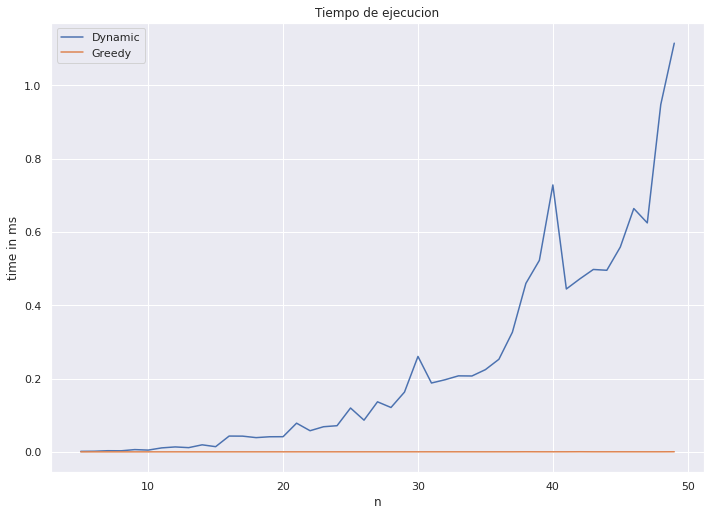

In [62]:
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; x2=[]
y=[]; y2=[]

for n in range(5, 50):

  W, val, wt = knapsack_instance_generator(n)
  W, val, wt

  t = repeat(setup="from __main__ import dynamic_knapsack", stmt=f"dynamic_knapsack({W}, {val}, {wt}, {n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import greedy_knapsack", stmt=f"greedy_knapsack({W}, {val}, {wt}, {n})", repeat=1, number=10)

  x.append(n)
  x2.append(n)
  y.append(t)
  y2.append(t2)
  
plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Dynamic", "Greedy"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

La diferencia entre el tiempo de ejecución entre ambos acercamientos se debe a cuanto depende el algoritmo dinámico del valor de la capacidad máxima $W$. A medida de que aumenta el valor de la capacidad máxima, más columnas habrán en la matriz que almacena valores anteriores y, por lo tanto, más subproblemas a resolver. Esta característica explica también lo mucho que varía el tiempo de ejecución. 

### 4.2 ***Subproblemas vs Iteraciones***

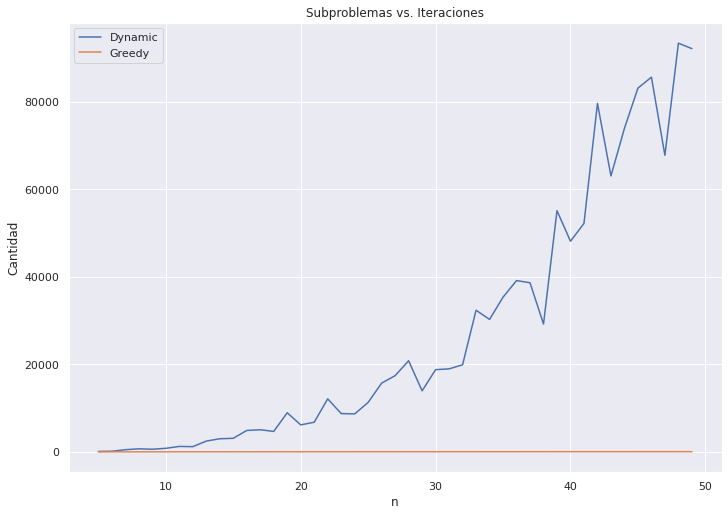

In [63]:
x = []; x2 = []
y = []; y2 = []

for n in range(5, 50):

  W, val, wt = knapsack_instance_generator(n)
  W, val, wt

  value, items, iterations = greedy_knapsack(W, val, wt, n)
  value, subproblems = dynamic_knapsack(W, val, wt, n)

  x.append(n)
  x2.append(n)
  y.append(subproblems)
  y2.append(iterations)


plt.plot(x,y)
plt.plot(x2,y2)

plt.legend(["Dynamic", "Greedy"])
plt.title("Subproblemas vs. Iteraciones")

plt.xlabel('n')
plt.ylabel('Cantidad')
plt.show()

Nuevamente, se observa que la cantidad de subproblemas depende de $W$ y $n$ para el algoritmo dinámico. Mientras, para la versión greedy siempre dependerá de $n$ solamente.